# **Project 1 Report**

Landon Fox

CS 458

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [1]:
# Codes for P1-1(a)
import numpy as np

def uniform_min_max_dist( n, dim ):
  # create n uniformly distributed vectors on [0, 1)^dim
  vals = np.random.rand( n, dim )
  # declare min and max
  min = np.linalg.norm( vals[ 0 ] - vals[ 1 ] )
  max = min
  # for each unique pair of vectors, compute and update min and max dist
  for i in range( n ):
    for j in range( i + 1, n ):
      dist = np.linalg.norm( vals[ i ] - vals[ j ] )
      if dist < min:
        min = dist
      elif dist > max:
        max = dist
  return min, max


# print result
min, max = uniform_min_max_dist( 1000, 1 )
print( 'difference between max and min dist : ' + str( max - min ) )

difference between max and min dist : 0.9928716009221676


**(b) Repeat (a) for different dimensions from 2 to 50.**

In [2]:
# Codes for P2-1(b)
import math

# as a result of the general function definition above,
# we can simply change its dimension argument
vals = []
for dim in range(1, 51):
  min, max = uniform_min_max_dist( 1000, dim )
  vals.append( math.log10( max / min - 1 ) )

Plot log_10(max-min)/min under different number of dimensions. 

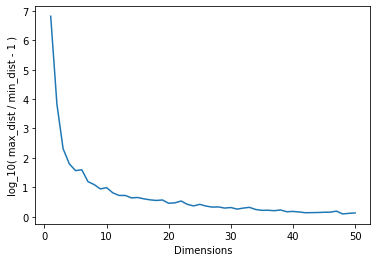

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel( 'Dimensions' )
ax.set_ylabel( 'log_10( max_dist / min_dist - 1 )' )
ax.plot( range( 1, 51 ), vals )

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

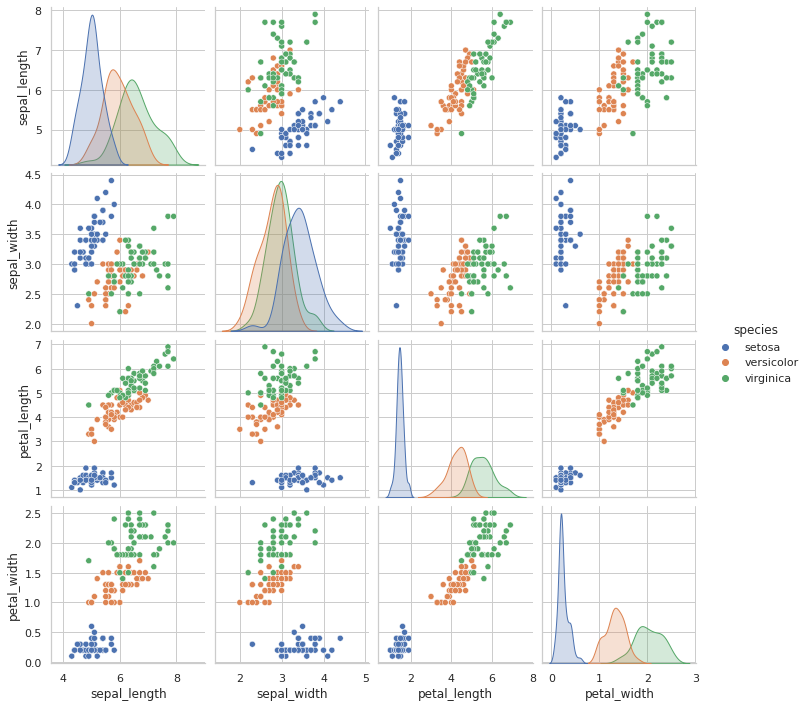

In [34]:
# Codes for P1-2(a)
import seaborn as sns

sns.set()
sns.set_style( 'whitegrid' )
iris = sns.load_dataset( 'iris' )
sns.pairplot( iris, hue='species' )

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

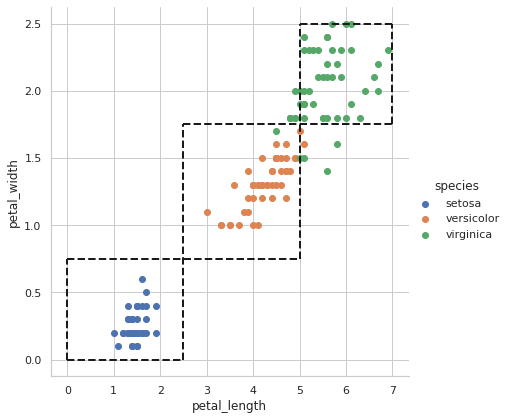

In [35]:
# Codes for P1-2(b)
sns.FacetGrid( iris, hue ="species", height = 6 ).map(plt.scatter, 'petal_length', 'petal_width' ).add_legend()
plt.plot( [ 0, 0 ], [ 0, 0.75 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 0, 2.5 ], [ 0, 0 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 2.5, 2.5 ], [ 0, 1.75 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 0, 5 ], [ 0.75, 0.75 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 2.5, 7 ], [ 1.75, 1.75 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 5, 5 ], [ 0.75, 2.5 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 5, 7 ], [ 2.5, 2.5 ], 'k-', lw=2, linestyle='dashed' )
plt.plot( [ 7, 7 ], [ 1.75, 2.5 ], 'k-', lw=2, linestyle='dashed' )
ax.spines[ 'bottom' ].set_position('zero')
plt.show()

In [36]:
import pandas as pd

species = {
  'setosa'     : [ 50, 0 ],
  'versicolor' : [ 49, 1 ],
  'virginica'  : [ 43, 7 ],
}
species_data = pd.DataFrame( species, index=[ 'classified', 'misclassified' ] )
print( species_data )

               setosa  versicolor  virginica
classified         50          49         43
misclassified       0           1          7


The proposed classification for setosa is in the interval [0, 2.5]x[0, 0.75], for versicolor its [2.5, 5]x[0.75, 1.75], and finally for virginica its [5, 7]x[1.75, 2.5]. We can see that setosa is properly classified; however, versicolor and virginica both have misclassifications. Versicolor has 2% error and virginica has 14% error.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

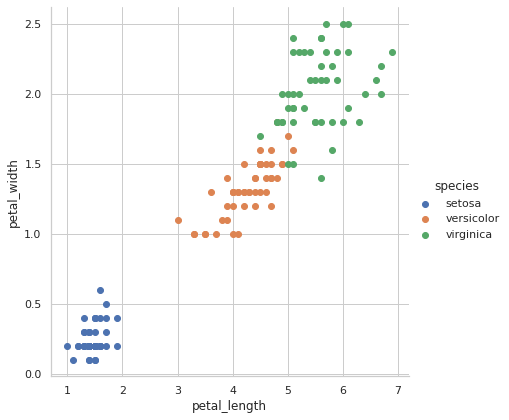

In [37]:
# Codes for P1-3(a)
sns.FacetGrid( iris, hue ="species", height = 6 ).map(plt.scatter, 'petal_length', 'petal_width' ).add_legend()
ax.spines[ 'bottom' ].set_position('zero')
plt.show()

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

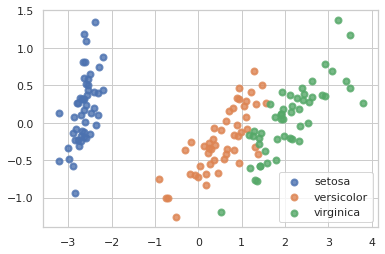

<Figure size 432x288 with 0 Axes>

In [60]:
# Codes for P1-3(b)
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()

pca = PCA( n_components=2 )
iris_trans = pca.fit( iris.data ).transform( iris.data )

for i, name in zip( range( 3 ), iris.target_names ):
    plt.scatter( iris_trans[ iris.target == i, 0 ], iris_trans[ iris.target == i, 1 ], alpha=.8, lw=2, label=name )
plt.legend()
plt.figure()
plt.show()

I believe that it is much easier to classify the species. Even with the figure from (a), we can distinguish between the setosa species and all others; the greater challenge is distinguishing between versicolor and virginica. Unlike (a), we had a rather large classification error rate, whereas with pca, it would appear only 5 or 6 samples would be misclassified with a simple linear decision boundary. Overall, the reduction of the dimension seems fruitful in regard to classification provided this sample.